## Master KP Classification

### Import Libraries

In [67]:
import numpy as np
import pandas as pd
import string
import time
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data

- Read csv file
- Split data into training and test sets
- Training = 80%
- Testing = 20%

In [68]:
df = pd.read_csv('master_kps.csv', sep=';')
df = df.sample(frac=1).reset_index(drop=True)

df_X = df[['Option1','Option2','Option3','Option4','Option5','Answer1','Alt1','Answer2','Alt2']]

for i, kp in enumerate(df["KP"]):
    kp = str(kp)
    df["KP"][i] = kp.split("||")

train_size = int(len(df) * .8)
train_ans = df_X[:train_size]
train_kp = df["KP"][:train_size]
test_ans = df_X[train_size:]
test_kp = df["KP"][train_size:]

- Set vocab size to be 1000 (for input words to vector form)
- Concat all options
- Concat all answers
- Do it for both training and testing x

In [69]:
vocab_size = 1000
train_words = np.array(train_ans)
test_words = np.array(test_ans)
train_words = train_words.reshape(train_words.shape[0]*train_words.shape[1])
test_words = test_words.reshape(test_words.shape[0]*test_words.shape[1])
words = np.array(np.concatenate((train_words,test_words)))
tokenize = text.Tokenizer(num_words=vocab_size)
tokenize.fit_on_texts(words)

tOptions = []
for i, train in enumerate(range(len(train_ans))):
    temp_list = []
    if train_ans['Option1'][i] != "none":
        temp_list.append(train_ans['Option1'][i])
    if train_ans['Option2'][i] != "none":
        temp_list.append(train_ans['Option2'][i])
    if train_ans['Option3'][i] != "none":
        temp_list.append(train_ans['Option3'][i])
    if train_ans['Option4'][i] != "none":
        temp_list.append(train_ans['Option4'][i])
    if train_ans['Option5'][i] != "none":
        temp_list.append(train_ans['Option5'][i])
    tOptions.append(temp_list)
    
tAns = []
for i, train in enumerate(range(len(train_ans))):
    temp_list = []
    if train_ans['Answer1'][i] != "none":
        temp_list.append(train_ans['Answer1'][i])
    if train_ans['Alt1'][i] != "none":
        temp_list.append(train_ans['Alt1'][i])
    if train_ans['Answer2'][i] != "none":
        temp_list.append(train_ans['Answer2'][i])
    if train_ans['Alt2'][i] != "none":
        temp_list.append(train_ans['Alt2'][i])
    tAns.append(temp_list)

for i, opt in enumerate(tOptions):
    tOptions[i] = tokenize.texts_to_matrix(opt)
    for j, val in enumerate(opt):
        if j != 0:
            tOptions[i][0] += tOptions[i][j]
            
for i, ans in enumerate(tAns):
    tAns[i] = tokenize.texts_to_matrix(ans)
    for j, val in enumerate(ans):
        if j != 0:
            tAns[i][0] += tAns[i][j]

x_train = []
for i, train in enumerate(range(len(train_ans))):
    temp = []
    x_train.append(temp)
    if len(tOptions[i]) == 0:
        x_train[i].append(np.zeros((vocab_size)))
    else:
        x_train[i].append(tOptions[i][0])
    if len(tAns[i]) == 0:
        x_train[i].append(np.zeros((vocab_size)))
    else:
        x_train[i].append(tAns[i][0])

x_train = np.array(x_train)

train_length = len(train_ans)
testOptions = []
for i, test in enumerate(range(len(test_ans))):
    temp_list = []
    if test_ans['Option1'][i+train_length] != "none":
        temp_list.append(test_ans['Option1'][i+train_length])
    if test_ans['Option2'][i+train_length] != "none":
        temp_list.append(test_ans['Option2'][i+train_length])
    if test_ans['Option3'][i+train_length] != "none":
        temp_list.append(test_ans['Option3'][i+train_length])
    if test_ans['Option4'][i+train_length] != "none":
        temp_list.append(test_ans['Option4'][i+train_length])
    if test_ans['Option5'][i+train_length] != "none":
        temp_list.append(test_ans['Option5'][i+train_length])
    testOptions.append(temp_list)

testAns = []
for i, test in enumerate(range(len(test_ans))):
    temp_list = []
    if test_ans['Answer1'][i+train_length] != "none":
        temp_list.append(test_ans['Answer1'][i+train_length])
    if test_ans['Alt1'][i+train_length] != "none":
        temp_list.append(test_ans['Alt1'][i+train_length])
    if test_ans['Answer2'][i+train_length] != "none":
        temp_list.append(test_ans['Answer2'][i+train_length])
    if test_ans['Alt2'][i+train_length] != "none":
        temp_list.append(test_ans['Alt2'][i+train_length])
    testAns.append(temp_list)

for i, opt in enumerate(testOptions):
    testOptions[i] = tokenize.texts_to_matrix(opt)
    for j, val in enumerate(opt):
        if j != 0:
            testOptions[i][0] += testOptions[i][j]
            
for i, ans in enumerate(testAns):
    testAns[i] = tokenize.texts_to_matrix(ans)
    for j, val in enumerate(ans):
        if j != 0:
            testAns[i][0] += testAns[i][j]

x_test = []
for i, test in enumerate(range(len(test_ans))):
    temp = []
    x_test.append(temp)
    if len(testOptions[i]) == 0:
        x_test[i].append(np.zeros((vocab_size)))
    else:
        x_test[i].append(testOptions[i][0])
    if len(testAns[i]) == 0:
        x_test[i].append(np.zeros((vocab_size)))
    else:
        x_test[i].append(testAns[i][0])
        
x_test = np.array(x_test)

- Split master KPs into different categories using Multi label Binarizer

In [70]:
encoder = preprocessing.MultiLabelBinarizer()
encoder.fit_transform(df["KP"])
y_train = encoder.transform(train_kp)
y_test = encoder.transform(test_kp)

- Reshape x_train and transform it to be represented by two features

In [71]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
pca = PCA(n_components=2).fit(x_train)
x_train = pca.transform(x_train)

### K-Means Classfication

- Split into Clusters (222 for number of Master KPs)
- Plot the results:
    - Colors for different categories
    - Black dots for data
    - White Cross for centroids

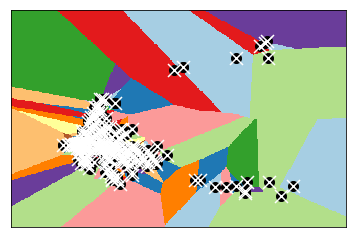

In [72]:
kmeans = KMeans(n_clusters=222, n_init=10, max_iter=300, tol=1e-4).fit(x_train)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(x_train[:, 0], x_train[:, 1], 'k.', markersize=20)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Predictions

- test[0][0] for input options, separated by space
- test[0][1] for input answers, separated by space

In [73]:
test = np.zeros((1,2,vocab_size))
test[0][0] = tokenize.texts_to_matrix(['she we'])
test[0][1] = tokenize.texts_to_matrix(['we'])
test = test.reshape((1,2*vocab_size))
test = pca.transform(test)

prediction = kmeans.predict(test)
print(prediction)

[212]
